In [24]:
import pandas as pd
import os, glob

folder = "DATA"
path = os.path.join(folder, "*.csv")
all_CSVs = glob.glob(path)

#load all dfs an merge to one
df_meta = []
all_channel_names = []
df_meta = pd.DataFrame(df_meta)
for csv in all_CSVs: 
    filename = os.path.basename(csv)
    if filename[-13:] == "automated.csv":
        channelName = filename.replace(filename[-14:], "")
        df = pd.read_csv(csv)
        df["Channel"]= channelName
        index = [i for i in range(len(df))]
        df.set_index([index, 'Channel'], inplace= True)
        #display(df)
        frames = [df_meta, df]
        df_meta = pd.concat(frames)
        if channelName not in all_channel_names:
            all_channel_names.append(channelName)
display(all_channel_names)


['ALLESUNDNICHTS',
 'Der Wahrheit verpflichtet',
 'Der Weg in deine Freiheit',
 'DRACHENTÖTER TV',
 'Rettung der Menschheit TV',
 'Schöpferwissen TV',
 'UBC TV',
 'VEIT CLUB']

No handles with labels found to put in legend.


,,publish_date,id,title,description,keywords,length,views,age_restricted,yt_caption_info,yt_caption_tracks,vid_info,Unnamed: 0
,Channel,,,,,,,,,,,,
0,UBC TV,2017-06-24,zoU6OK2lRi8,wenn du wirklich wissen willst,geisteskraft-thailand.com\nubc-unabellacompani...,"['UBC', 'Entprogrammierung', 'Geisteskraft Tha...",647,488,False,"{'a.de': <Caption lang=""German (auto-generated...",{'responseContext': {'visitorData': 'CgsxUmd6c...,0.0,NaN
1,UBC TV,2017-06-16,TvNRRdyB200,"Der Kampf an der Front Erkennt, Versteht und...",geisteskraft-thailand.com\n\nubc-unabellacompa...,"['UBC', 'Entprogrammierung', 'Geisteskraft Tha...",774,510,False,"{'a.de': <Caption lang=""German (auto-generated...",{'responseContext': {'visitorData': 'CgtBS0hmO...,0.0,NaN
2,UBC TV,2017-06-12,Q_ihQBKHjdU,Er musste den Weg gehen um zu verstehen Thoma...,http://www.ubc-unabellacompania.com\nhttp://ww...,"['UBC', 'Entprogrammierung', 'Geisteskraft Tha...",76,170,False,{},{'responseContext': {'visitorData': 'CgtySlZtR...,0.0,NaN
3,UBC TV,2017-06-12,w_QJZ4ieiEE,Statement über das Wirken von Thomas a F Veit ...,http://www.ubc-unabellacompania.com\nhttp://ww...,"['UBC', 'Entprogrammierung', 'Geisteskraft Tha...",538,187,False,"{'a.de': <Caption lang=""German (auto-generated...",{'responseContext': {'visitorData': 'Cgt4QVNpd...,0.0,NaN
4,UBC TV,2017-06-06,gnCLm271hlE,Thomas im Einsatz Fernstudium Ein Erfolgsb...,ubc-unabellacompania.com,"['UBC', 'Entprogrammierung', 'Geisteskraft Tha...",1991,595,False,"{'a.de': <Caption lang=""German (auto-generated...",{'responseContext': {'visitorData': 'CgtTRWt2M...,0.0,NaN
5,UBC TV,2017-06-01,3EvwyQNsBJM,Exit aus der Matrix Thomas aus dem Hause Veit,ubc-unabellacompania.com,"['UBC', 'Entprogrammierung', 'Geisteskraft Tha...",63,236,False,{},{'responseContext': {'visitorData': 'CgtFaU54b...,0.0,NaN
6,UBC TV,2017-06-01,KXLi8JJ-r6Q,"Der Weg der Entprogrammierung Erkennen, Verst...",ubc-unabellacompania.com,"['UBC', 'Entprogrammierung', 'Struckturiertes ...",1320,307,False,"{'a.de': <Caption lang=""German (auto-generated...",{'responseContext': {'visitorData': 'Cgstb3hVR...,0.0,NaN
7,UBC TV,2017-05-28,-vVEZR7LJCU,Fernstudium in der Ferne - Erfahrungsbericht S...,http://ubc-unabellacompania.com/,"['Thailand', 'Entprogrammierung', 'Fernstudium...",2240,228,False,"{'a.de': <Caption lang=""German (auto-generated...",{'responseContext': {'visitorData': 'CgtMNDdRe...,0.0,NaN
8,UBC TV,2017-05-23,_LsaPslIIsA,Handeln im Strukturierten Prinzip der Liebe ...,http://www.ubc-unabellacompania.com,"['UBC', 'Una Bella Compania', 'Rettung', 'Entp...",1216,236,False,"{'a.de': <Caption lang=""German (auto-generated...",{'responseContext': {'visitorData': 'CgtzeVFON...,0.0,NaN


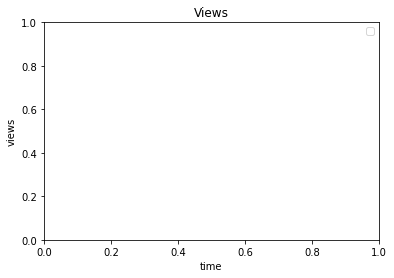

In [25]:
import matplotlib.pyplot as plt
plt.title("Views")
plt.ylabel("views")
plt.xlabel("time")
plt.legend()
df_meta.loc[df_meta.index.get_level_values("Channel") == "UBC TV"]
